In [1]:
import giraffe
import matplotlib.pyplot as plt
from netZooPy.otter.otter import otter
from netZooPy.panda import Panda
import notebooks
import numpy as np
import pandas as pd
from data.liver import preprocessing
import seaborn as sn
from sklearn.metrics import roc_curve, auc

In [2]:
cache = True

In [3]:
if not cache:
    preprocessing.generate_data()
else:
    expression = pd.read_csv("data/liver/raw/expression.csv", index_col = 0)
    motif = pd.read_csv("data/liver/motif.csv", index_col = 0)
    ppi = pd.read_csv("data/liver/ppi_matrix.csv", index_col = 0)
    chip = pd.read_csv("data/liver/chip.csv", index_col = 0)

In [4]:
print(expression.shape)
print(motif.shape)
print(ppi.shape)
print(chip.shape)

(30243, 137)
(30243, 644)
(644, 644)
(30243, 644)


## 2. Benchmarking

### 2.1 GIRAFFE

In [5]:
if cache:
    R_giraffe = pd.read_csv("data/liver/R_giraffe.csv", index_col = 0)
else:
    R_giraffe = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()
    pd.DataFrame(R_giraffe, index = motif.index, columns = motif.columns).to_csv("data/liver/R_giraffe.csv")

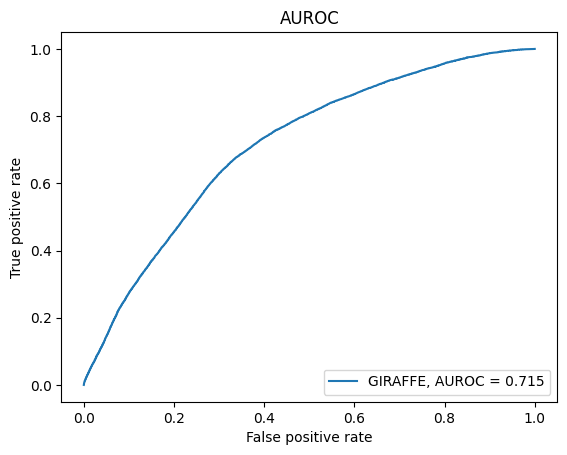

[0.715]

In [14]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [R_giraffe.to_numpy().flatten()], ['GIRAFFE'])

### 2.2 OTTER [2]

In [6]:
if cache:
    R_otter = pd.read_csv("data/liver/R_otter.csv", index_col = 0)
else:
    R_otter = otter(motif.T.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy())).T
    pd.DataFrame(R_otter, index = motif.index, columns = motif.columns).to_csv("data/liver/R_otter.csv")

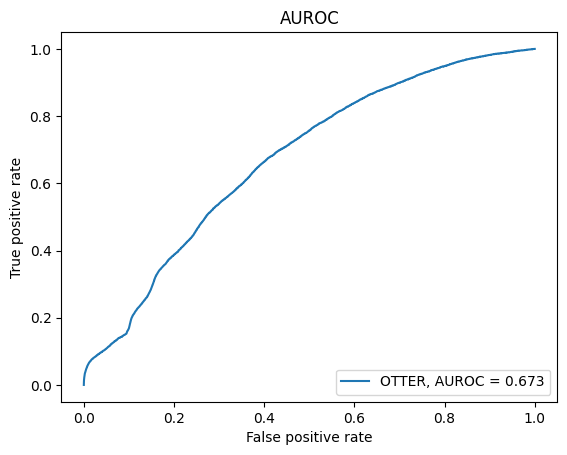

[0.673]

In [25]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [a.to_numpy().flatten()], ['OTTER'])

### 2.3 PANDA [1]

In [7]:
R_panda_raw = pd.read_csv("data/liver/R_panda.csv", index_col = 0).T
R_panda = pd.DataFrame(0, index = motif.index, columns = motif.columns)
for g in R_panda_raw.index:
    for tf in R_panda_raw.columns:
        R_panda.at[g, tf] = R_panda_raw.at[g, tf]

### 2.4 Motif-based prior

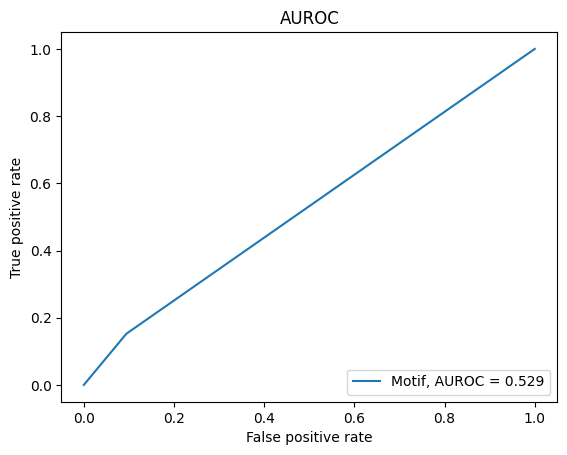

[0.529]

In [8]:
notebooks.plot_auroc(chip.to_numpy(), [motif.to_numpy().flatten()], ["Motif"])

### 2.5 GENIE3 [3]

In [ ]:
model = notebooks.GENIE3(expression.to_numpy().T, gene_names = list(expression.index) ,regulators = list(expression.index), ntrees=5)

Tree method: RF
K: sqrt
Number of trees: 5


running single threaded jobs
Gene 1/30243...
Gene 2/30243...
Gene 3/30243...
Gene 4/30243...
Gene 5/30243...
Gene 6/30243...
Gene 7/30243...
Gene 8/30243...
Gene 9/30243...
Gene 10/30243...
Gene 11/30243...
Gene 12/30243...
Gene 13/30243...
Gene 14/30243...
Gene 15/30243...
Gene 16/30243...
Gene 17/30243...
Gene 18/30243...
Gene 19/30243...
Gene 20/30243...
Gene 21/30243...
Gene 22/30243...
Gene 23/30243...
Gene 24/30243...
Gene 25/30243...
Gene 26/30243...
Gene 27/30243...
Gene 28/30243...
Gene 29/30243...
Gene 30/30243...
Gene 31/30243...
Gene 32/30243...
Gene 33/30243...
Gene 34/30243...
Gene 35/30243...
Gene 36/30243...
Gene 37/30243...
Gene 38/30243...
Gene 39/30243...
Gene 40/30243...
Gene 41/30243...
Gene 42/30243...
Gene 43/30243...
Gene 44/30243...
Gene 45/30243...
Gene 46/30243...
Gene 47/30243...
Gene 48/30243...
Gene 49/30243...
Gene 50/30243...
Gene 51/30243...
Gene 52/30243...
Gene 53/30243...
Gene 54/30243...
Gene 55/30243...


Gene 462/30243...
Gene 463/30243...
Gene 464/30243...
Gene 465/30243...
Gene 466/30243...
Gene 467/30243...
Gene 468/30243...
Gene 469/30243...
Gene 470/30243...
Gene 471/30243...
Gene 472/30243...
Gene 473/30243...
Gene 474/30243...
Gene 475/30243...
Gene 476/30243...
Gene 477/30243...
Gene 478/30243...
Gene 479/30243...
Gene 480/30243...
Gene 481/30243...
Gene 482/30243...
Gene 483/30243...
Gene 484/30243...
Gene 485/30243...
Gene 486/30243...
Gene 487/30243...
Gene 488/30243...
Gene 489/30243...
Gene 490/30243...
Gene 491/30243...
Gene 492/30243...
Gene 493/30243...
Gene 494/30243...
Gene 495/30243...
Gene 496/30243...
Gene 497/30243...
Gene 498/30243...
Gene 499/30243...
Gene 500/30243...
Gene 501/30243...
Gene 502/30243...
Gene 503/30243...
Gene 504/30243...
Gene 505/30243...
Gene 506/30243...
Gene 507/30243...
Gene 508/30243...
Gene 509/30243...
Gene 510/30243...
Gene 511/30243...
Gene 512/30243...
Gene 513/30243...
Gene 514/30243...
Gene 515/30243...
Gene 516/30243...
Gene 517/3

Gene 918/30243...
Gene 919/30243...
Gene 920/30243...
Gene 921/30243...
Gene 922/30243...
Gene 923/30243...
Gene 924/30243...
Gene 925/30243...
Gene 926/30243...
Gene 927/30243...
Gene 928/30243...
Gene 929/30243...
Gene 930/30243...
Gene 931/30243...
Gene 932/30243...
Gene 933/30243...
Gene 934/30243...
Gene 935/30243...
Gene 936/30243...
Gene 937/30243...
Gene 938/30243...
Gene 939/30243...
Gene 940/30243...
Gene 941/30243...
Gene 942/30243...
Gene 943/30243...
Gene 944/30243...
Gene 945/30243...
Gene 946/30243...
Gene 947/30243...
Gene 948/30243...
Gene 949/30243...
Gene 950/30243...
Gene 951/30243...
Gene 952/30243...
Gene 953/30243...
Gene 954/30243...
Gene 955/30243...
Gene 956/30243...
Gene 957/30243...
Gene 958/30243...
Gene 959/30243...
Gene 960/30243...
Gene 961/30243...
Gene 962/30243...
Gene 963/30243...
Gene 964/30243...
Gene 965/30243...
Gene 966/30243...
Gene 967/30243...
Gene 968/30243...
Gene 969/30243...
Gene 970/30243...
Gene 971/30243...
Gene 972/30243...
Gene 973/3

Gene 1356/30243...
Gene 1357/30243...
Gene 1358/30243...
Gene 1359/30243...
Gene 1360/30243...
Gene 1361/30243...
Gene 1362/30243...
Gene 1363/30243...
Gene 1364/30243...
Gene 1365/30243...
Gene 1366/30243...
Gene 1367/30243...
Gene 1368/30243...
Gene 1369/30243...
Gene 1370/30243...
Gene 1371/30243...
Gene 1372/30243...
Gene 1373/30243...
Gene 1374/30243...
Gene 1375/30243...
Gene 1376/30243...
Gene 1377/30243...
Gene 1378/30243...
Gene 1379/30243...
Gene 1380/30243...
Gene 1381/30243...
Gene 1382/30243...
Gene 1383/30243...
Gene 1384/30243...
Gene 1385/30243...
Gene 1386/30243...
Gene 1387/30243...
Gene 1388/30243...
Gene 1389/30243...
Gene 1390/30243...
Gene 1391/30243...
Gene 1392/30243...
Gene 1393/30243...
Gene 1394/30243...
Gene 1395/30243...
Gene 1396/30243...
Gene 1397/30243...
Gene 1398/30243...
Gene 1399/30243...
Gene 1400/30243...
Gene 1401/30243...
Gene 1402/30243...
Gene 1403/30243...
Gene 1404/30243...
Gene 1405/30243...
Gene 1406/30243...
Gene 1407/30243...
Gene 1408/30

Gene 1788/30243...
Gene 1789/30243...
Gene 1790/30243...
Gene 1791/30243...
Gene 1792/30243...
Gene 1793/30243...
Gene 1794/30243...
Gene 1795/30243...
Gene 1796/30243...
Gene 1797/30243...
Gene 1798/30243...
Gene 1799/30243...
Gene 1800/30243...
Gene 1801/30243...
Gene 1802/30243...
Gene 1803/30243...
Gene 1804/30243...
Gene 1805/30243...
Gene 1806/30243...
Gene 1807/30243...
Gene 1808/30243...
Gene 1809/30243...
Gene 1810/30243...
Gene 1811/30243...
Gene 1812/30243...
Gene 1813/30243...
Gene 1814/30243...
Gene 1815/30243...
Gene 1816/30243...
Gene 1817/30243...
Gene 1818/30243...
Gene 1819/30243...
Gene 1820/30243...
Gene 1821/30243...
Gene 1822/30243...
Gene 1823/30243...
Gene 1824/30243...
Gene 1825/30243...
Gene 1826/30243...
Gene 1827/30243...
Gene 1828/30243...
Gene 1829/30243...
Gene 1830/30243...
Gene 1831/30243...
Gene 1832/30243...
Gene 1833/30243...
Gene 1834/30243...
Gene 1835/30243...
Gene 1836/30243...
Gene 1837/30243...
Gene 1838/30243...
Gene 1839/30243...
Gene 1840/30

Gene 2225/30243...
Gene 2226/30243...
Gene 2227/30243...
Gene 2228/30243...
Gene 2229/30243...
Gene 2230/30243...
Gene 2231/30243...
Gene 2232/30243...
Gene 2233/30243...
Gene 2234/30243...
Gene 2235/30243...
Gene 2236/30243...
Gene 2237/30243...
Gene 2238/30243...
Gene 2239/30243...
Gene 2240/30243...
Gene 2241/30243...
Gene 2242/30243...
Gene 2243/30243...
Gene 2244/30243...
Gene 2245/30243...
Gene 2246/30243...
Gene 2247/30243...
Gene 2248/30243...
Gene 2249/30243...
Gene 2250/30243...
Gene 2251/30243...
Gene 2252/30243...
Gene 2253/30243...
Gene 2254/30243...
Gene 2255/30243...
Gene 2256/30243...
Gene 2257/30243...
Gene 2258/30243...
Gene 2259/30243...
Gene 2260/30243...
Gene 2261/30243...
Gene 2262/30243...
Gene 2263/30243...
Gene 2264/30243...
Gene 2265/30243...
Gene 2266/30243...
Gene 2267/30243...
Gene 2268/30243...
Gene 2269/30243...
Gene 2270/30243...
Gene 2271/30243...
Gene 2272/30243...
Gene 2273/30243...
Gene 2274/30243...
Gene 2275/30243...
Gene 2276/30243...
Gene 2277/30

Gene 2661/30243...
Gene 2662/30243...
Gene 2663/30243...
Gene 2664/30243...
Gene 2665/30243...
Gene 2666/30243...
Gene 2667/30243...
Gene 2668/30243...
Gene 2669/30243...
Gene 2670/30243...
Gene 2671/30243...
Gene 2672/30243...
Gene 2673/30243...
Gene 2674/30243...
Gene 2675/30243...
Gene 2676/30243...
Gene 2677/30243...
Gene 2678/30243...
Gene 2679/30243...
Gene 2680/30243...
Gene 2681/30243...
Gene 2682/30243...
Gene 2683/30243...
Gene 2684/30243...
Gene 2685/30243...
Gene 2686/30243...
Gene 2687/30243...
Gene 2688/30243...
Gene 2689/30243...
Gene 2690/30243...
Gene 2691/30243...
Gene 2692/30243...
Gene 2693/30243...
Gene 2694/30243...
Gene 2695/30243...
Gene 2696/30243...
Gene 2697/30243...
Gene 2698/30243...
Gene 2699/30243...
Gene 2700/30243...
Gene 2701/30243...
Gene 2702/30243...
Gene 2703/30243...
Gene 2704/30243...
Gene 2705/30243...
Gene 2706/30243...
Gene 2707/30243...
Gene 2708/30243...
Gene 2709/30243...
Gene 2710/30243...
Gene 2711/30243...
Gene 2712/30243...
Gene 2713/30

Gene 3094/30243...
Gene 3095/30243...
Gene 3096/30243...
Gene 3097/30243...
Gene 3098/30243...
Gene 3099/30243...
Gene 3100/30243...
Gene 3101/30243...
Gene 3102/30243...
Gene 3103/30243...
Gene 3104/30243...
Gene 3105/30243...
Gene 3106/30243...
Gene 3107/30243...
Gene 3108/30243...
Gene 3109/30243...
Gene 3110/30243...
Gene 3111/30243...
Gene 3112/30243...
Gene 3113/30243...
Gene 3114/30243...
Gene 3115/30243...
Gene 3116/30243...
Gene 3117/30243...
Gene 3118/30243...
Gene 3119/30243...
Gene 3120/30243...
Gene 3121/30243...
Gene 3122/30243...
Gene 3123/30243...
Gene 3124/30243...
Gene 3125/30243...
Gene 3126/30243...
Gene 3127/30243...
Gene 3128/30243...
Gene 3129/30243...
Gene 3130/30243...
Gene 3131/30243...
Gene 3132/30243...
Gene 3133/30243...
Gene 3134/30243...
Gene 3135/30243...
Gene 3136/30243...
Gene 3137/30243...
Gene 3138/30243...
Gene 3139/30243...
Gene 3140/30243...
Gene 3141/30243...
Gene 3142/30243...
Gene 3143/30243...
Gene 3144/30243...
Gene 3145/30243...
Gene 3146/30

Gene 3527/30243...
Gene 3528/30243...
Gene 3529/30243...
Gene 3530/30243...
Gene 3531/30243...
Gene 3532/30243...
Gene 3533/30243...
Gene 3534/30243...
Gene 3535/30243...
Gene 3536/30243...
Gene 3537/30243...
Gene 3538/30243...
Gene 3539/30243...
Gene 3540/30243...
Gene 3541/30243...
Gene 3542/30243...
Gene 3543/30243...
Gene 3544/30243...
Gene 3545/30243...
Gene 3546/30243...
Gene 3547/30243...
Gene 3548/30243...
Gene 3549/30243...
Gene 3550/30243...
Gene 3551/30243...
Gene 3552/30243...
Gene 3553/30243...
Gene 3554/30243...
Gene 3555/30243...
Gene 3556/30243...
Gene 3557/30243...
Gene 3558/30243...
Gene 3559/30243...
Gene 3560/30243...
Gene 3561/30243...
Gene 3562/30243...
Gene 3563/30243...
Gene 3564/30243...
Gene 3565/30243...
Gene 3566/30243...
Gene 3567/30243...
Gene 3568/30243...
Gene 3569/30243...
Gene 3570/30243...
Gene 3571/30243...
Gene 3572/30243...
Gene 3573/30243...
Gene 3574/30243...
Gene 3575/30243...
Gene 3576/30243...
Gene 3577/30243...
Gene 3578/30243...
Gene 3579/30

Gene 3960/30243...
Gene 3961/30243...
Gene 3962/30243...
Gene 3963/30243...
Gene 3964/30243...
Gene 3965/30243...
Gene 3966/30243...
Gene 3967/30243...
Gene 3968/30243...
Gene 3969/30243...
Gene 3970/30243...
Gene 3971/30243...
Gene 3972/30243...
Gene 3973/30243...
Gene 3974/30243...
Gene 3975/30243...
Gene 3976/30243...
Gene 3977/30243...
Gene 3978/30243...
Gene 3979/30243...
Gene 3980/30243...
Gene 3981/30243...
Gene 3982/30243...
Gene 3983/30243...
Gene 3984/30243...
Gene 3985/30243...
Gene 3986/30243...
Gene 3987/30243...
Gene 3988/30243...
Gene 3989/30243...
Gene 3990/30243...
Gene 3991/30243...
Gene 3992/30243...
Gene 3993/30243...
Gene 3994/30243...
Gene 3995/30243...
Gene 3996/30243...
Gene 3997/30243...
Gene 3998/30243...
Gene 3999/30243...
Gene 4000/30243...
Gene 4001/30243...
Gene 4002/30243...
Gene 4003/30243...
Gene 4004/30243...
Gene 4005/30243...
Gene 4006/30243...
Gene 4007/30243...
Gene 4008/30243...
Gene 4009/30243...
Gene 4010/30243...
Gene 4011/30243...
Gene 4012/30

Gene 4396/30243...
Gene 4397/30243...
Gene 4398/30243...
Gene 4399/30243...
Gene 4400/30243...
Gene 4401/30243...
Gene 4402/30243...
Gene 4403/30243...
Gene 4404/30243...
Gene 4405/30243...
Gene 4406/30243...
Gene 4407/30243...
Gene 4408/30243...
Gene 4409/30243...
Gene 4410/30243...
Gene 4411/30243...
Gene 4412/30243...
Gene 4413/30243...
Gene 4414/30243...
Gene 4415/30243...
Gene 4416/30243...
Gene 4417/30243...
Gene 4418/30243...
Gene 4419/30243...
Gene 4420/30243...
Gene 4421/30243...
Gene 4422/30243...
Gene 4423/30243...
Gene 4424/30243...
Gene 4425/30243...
Gene 4426/30243...
Gene 4427/30243...
Gene 4428/30243...
Gene 4429/30243...
Gene 4430/30243...
Gene 4431/30243...
Gene 4432/30243...
Gene 4433/30243...
Gene 4434/30243...
Gene 4435/30243...
Gene 4436/30243...
Gene 4437/30243...
Gene 4438/30243...
Gene 4439/30243...
Gene 4440/30243...
Gene 4441/30243...
Gene 4442/30243...
Gene 4443/30243...
Gene 4444/30243...
Gene 4445/30243...
Gene 4446/30243...
Gene 4447/30243...
Gene 4448/30

Gene 4831/30243...
Gene 4832/30243...
Gene 4833/30243...
Gene 4834/30243...
Gene 4835/30243...
Gene 4836/30243...
Gene 4837/30243...
Gene 4838/30243...
Gene 4839/30243...
Gene 4840/30243...
Gene 4841/30243...
Gene 4842/30243...
Gene 4843/30243...
Gene 4844/30243...
Gene 4845/30243...
Gene 4846/30243...
Gene 4847/30243...
Gene 4848/30243...
Gene 4849/30243...
Gene 4850/30243...
Gene 4851/30243...
Gene 4852/30243...
Gene 4853/30243...
Gene 4854/30243...
Gene 4855/30243...
Gene 4856/30243...
Gene 4857/30243...
Gene 4858/30243...
Gene 4859/30243...
Gene 4860/30243...
Gene 4861/30243...
Gene 4862/30243...
Gene 4863/30243...
Gene 4864/30243...
Gene 4865/30243...
Gene 4866/30243...
Gene 4867/30243...
Gene 4868/30243...
Gene 4869/30243...
Gene 4870/30243...
Gene 4871/30243...
Gene 4872/30243...
Gene 4873/30243...
Gene 4874/30243...
Gene 4875/30243...
Gene 4876/30243...
Gene 4877/30243...
Gene 4878/30243...
Gene 4879/30243...
Gene 4880/30243...
Gene 4881/30243...
Gene 4882/30243...
Gene 4883/30

Gene 5264/30243...
Gene 5265/30243...
Gene 5266/30243...
Gene 5267/30243...
Gene 5268/30243...
Gene 5269/30243...
Gene 5270/30243...
Gene 5271/30243...
Gene 5272/30243...
Gene 5273/30243...
Gene 5274/30243...
Gene 5275/30243...
Gene 5276/30243...
Gene 5277/30243...
Gene 5278/30243...
Gene 5279/30243...
Gene 5280/30243...
Gene 5281/30243...
Gene 5282/30243...
Gene 5283/30243...
Gene 5284/30243...
Gene 5285/30243...
Gene 5286/30243...
Gene 5287/30243...
Gene 5288/30243...
Gene 5289/30243...
Gene 5290/30243...
Gene 5291/30243...
Gene 5292/30243...
Gene 5293/30243...
Gene 5294/30243...
Gene 5295/30243...
Gene 5296/30243...
Gene 5297/30243...
Gene 5298/30243...
Gene 5299/30243...
Gene 5300/30243...
Gene 5301/30243...
Gene 5302/30243...
Gene 5303/30243...
Gene 5304/30243...
Gene 5305/30243...
Gene 5306/30243...
Gene 5307/30243...
Gene 5308/30243...
Gene 5309/30243...
Gene 5310/30243...
Gene 5311/30243...
Gene 5312/30243...
Gene 5313/30243...
Gene 5314/30243...
Gene 5315/30243...
Gene 5316/30

Gene 5696/30243...
Gene 5697/30243...
Gene 5698/30243...
Gene 5699/30243...
Gene 5700/30243...
Gene 5701/30243...
Gene 5702/30243...
Gene 5703/30243...
Gene 5704/30243...
Gene 5705/30243...
Gene 5706/30243...
Gene 5707/30243...
Gene 5708/30243...
Gene 5709/30243...
Gene 5710/30243...
Gene 5711/30243...
Gene 5712/30243...
Gene 5713/30243...
Gene 5714/30243...
Gene 5715/30243...
Gene 5716/30243...
Gene 5717/30243...
Gene 5718/30243...
Gene 5719/30243...
Gene 5720/30243...
Gene 5721/30243...
Gene 5722/30243...
Gene 5723/30243...
Gene 5724/30243...
Gene 5725/30243...
Gene 5726/30243...
Gene 5727/30243...
Gene 5728/30243...
Gene 5729/30243...
Gene 5730/30243...
Gene 5731/30243...
Gene 5732/30243...
Gene 5733/30243...
Gene 5734/30243...
Gene 5735/30243...
Gene 5736/30243...
Gene 5737/30243...
Gene 5738/30243...
Gene 5739/30243...
Gene 5740/30243...
Gene 5741/30243...
Gene 5742/30243...
Gene 5743/30243...
Gene 5744/30243...
Gene 5745/30243...
Gene 5746/30243...
Gene 5747/30243...
Gene 5748/30

Gene 6129/30243...
Gene 6130/30243...
Gene 6131/30243...
Gene 6132/30243...
Gene 6133/30243...
Gene 6134/30243...
Gene 6135/30243...
Gene 6136/30243...
Gene 6137/30243...
Gene 6138/30243...
Gene 6139/30243...
Gene 6140/30243...
Gene 6141/30243...
Gene 6142/30243...
Gene 6143/30243...
Gene 6144/30243...
Gene 6145/30243...
Gene 6146/30243...
Gene 6147/30243...
Gene 6148/30243...
Gene 6149/30243...
Gene 6150/30243...
Gene 6151/30243...
Gene 6152/30243...
Gene 6153/30243...
Gene 6154/30243...
Gene 6155/30243...
Gene 6156/30243...
Gene 6157/30243...
Gene 6158/30243...
Gene 6159/30243...
Gene 6160/30243...
Gene 6161/30243...
Gene 6162/30243...
Gene 6163/30243...
Gene 6164/30243...
Gene 6165/30243...
Gene 6166/30243...
Gene 6167/30243...
Gene 6168/30243...
Gene 6169/30243...
Gene 6170/30243...
Gene 6171/30243...
Gene 6172/30243...
Gene 6173/30243...
Gene 6174/30243...
Gene 6175/30243...
Gene 6176/30243...
Gene 6177/30243...
Gene 6178/30243...
Gene 6179/30243...
Gene 6180/30243...
Gene 6181/30

Gene 6561/30243...
Gene 6562/30243...
Gene 6563/30243...
Gene 6564/30243...
Gene 6565/30243...
Gene 6566/30243...
Gene 6567/30243...
Gene 6568/30243...
Gene 6569/30243...
Gene 6570/30243...
Gene 6571/30243...
Gene 6572/30243...
Gene 6573/30243...
Gene 6574/30243...
Gene 6575/30243...
Gene 6576/30243...
Gene 6577/30243...
Gene 6578/30243...
Gene 6579/30243...
Gene 6580/30243...
Gene 6581/30243...
Gene 6582/30243...
Gene 6583/30243...
Gene 6584/30243...
Gene 6585/30243...
Gene 6586/30243...
Gene 6587/30243...
Gene 6588/30243...
Gene 6589/30243...
Gene 6590/30243...
Gene 6591/30243...
Gene 6592/30243...
Gene 6593/30243...
Gene 6594/30243...
Gene 6595/30243...
Gene 6596/30243...
Gene 6597/30243...
Gene 6598/30243...
Gene 6599/30243...
Gene 6600/30243...
Gene 6601/30243...
Gene 6602/30243...
Gene 6603/30243...
Gene 6604/30243...
Gene 6605/30243...
Gene 6606/30243...
Gene 6607/30243...
Gene 6608/30243...
Gene 6609/30243...
Gene 6610/30243...
Gene 6611/30243...
Gene 6612/30243...
Gene 6613/30

Gene 6994/30243...
Gene 6995/30243...
Gene 6996/30243...
Gene 6997/30243...
Gene 6998/30243...
Gene 6999/30243...
Gene 7000/30243...
Gene 7001/30243...
Gene 7002/30243...
Gene 7003/30243...
Gene 7004/30243...
Gene 7005/30243...
Gene 7006/30243...
Gene 7007/30243...
Gene 7008/30243...
Gene 7009/30243...
Gene 7010/30243...
Gene 7011/30243...
Gene 7012/30243...
Gene 7013/30243...
Gene 7014/30243...
Gene 7015/30243...
Gene 7016/30243...
Gene 7017/30243...
Gene 7018/30243...
Gene 7019/30243...
Gene 7020/30243...
Gene 7021/30243...
Gene 7022/30243...
Gene 7023/30243...
Gene 7024/30243...
Gene 7025/30243...
Gene 7026/30243...
Gene 7027/30243...
Gene 7028/30243...
Gene 7029/30243...
Gene 7030/30243...
Gene 7031/30243...
Gene 7032/30243...
Gene 7033/30243...
Gene 7034/30243...
Gene 7035/30243...
Gene 7036/30243...
Gene 7037/30243...
Gene 7038/30243...
Gene 7039/30243...
Gene 7040/30243...
Gene 7041/30243...
Gene 7042/30243...
Gene 7043/30243...
Gene 7044/30243...
Gene 7045/30243...
Gene 7046/30

Gene 7428/30243...
Gene 7429/30243...
Gene 7430/30243...
Gene 7431/30243...
Gene 7432/30243...
Gene 7433/30243...
Gene 7434/30243...
Gene 7435/30243...
Gene 7436/30243...
Gene 7437/30243...
Gene 7438/30243...
Gene 7439/30243...
Gene 7440/30243...
Gene 7441/30243...
Gene 7442/30243...
Gene 7443/30243...
Gene 7444/30243...
Gene 7445/30243...
Gene 7446/30243...
Gene 7447/30243...
Gene 7448/30243...
Gene 7449/30243...
Gene 7450/30243...
Gene 7451/30243...
Gene 7452/30243...
Gene 7453/30243...
Gene 7454/30243...
Gene 7455/30243...
Gene 7456/30243...
Gene 7457/30243...
Gene 7458/30243...
Gene 7459/30243...
Gene 7460/30243...
Gene 7461/30243...
Gene 7462/30243...
Gene 7463/30243...
Gene 7464/30243...
Gene 7465/30243...
Gene 7466/30243...
Gene 7467/30243...
Gene 7468/30243...
Gene 7469/30243...
Gene 7470/30243...
Gene 7471/30243...
Gene 7472/30243...
Gene 7473/30243...
Gene 7474/30243...
Gene 7475/30243...
Gene 7476/30243...
Gene 7477/30243...
Gene 7478/30243...
Gene 7479/30243...
Gene 7480/30

Gene 7863/30243...
Gene 7864/30243...
Gene 7865/30243...
Gene 7866/30243...
Gene 7867/30243...
Gene 7868/30243...
Gene 7869/30243...
Gene 7870/30243...
Gene 7871/30243...
Gene 7872/30243...
Gene 7873/30243...
Gene 7874/30243...
Gene 7875/30243...
Gene 7876/30243...
Gene 7877/30243...
Gene 7878/30243...
Gene 7879/30243...
Gene 7880/30243...
Gene 7881/30243...
Gene 7882/30243...
Gene 7883/30243...
Gene 7884/30243...
Gene 7885/30243...
Gene 7886/30243...
Gene 7887/30243...
Gene 7888/30243...
Gene 7889/30243...
Gene 7890/30243...
Gene 7891/30243...
Gene 7892/30243...
Gene 7893/30243...
Gene 7894/30243...
Gene 7895/30243...
Gene 7896/30243...
Gene 7897/30243...
Gene 7898/30243...
Gene 7899/30243...
Gene 7900/30243...
Gene 7901/30243...
Gene 7902/30243...
Gene 7903/30243...
Gene 7904/30243...
Gene 7905/30243...
Gene 7906/30243...
Gene 7907/30243...
Gene 7908/30243...
Gene 7909/30243...
Gene 7910/30243...
Gene 7911/30243...
Gene 7912/30243...
Gene 7913/30243...
Gene 7914/30243...
Gene 7915/30

Gene 8296/30243...
Gene 8297/30243...
Gene 8298/30243...
Gene 8299/30243...
Gene 8300/30243...
Gene 8301/30243...
Gene 8302/30243...
Gene 8303/30243...
Gene 8304/30243...
Gene 8305/30243...
Gene 8306/30243...
Gene 8307/30243...
Gene 8308/30243...
Gene 8309/30243...
Gene 8310/30243...
Gene 8311/30243...
Gene 8312/30243...
Gene 8313/30243...
Gene 8314/30243...
Gene 8315/30243...
Gene 8316/30243...
Gene 8317/30243...
Gene 8318/30243...
Gene 8319/30243...
Gene 8320/30243...
Gene 8321/30243...
Gene 8322/30243...
Gene 8323/30243...
Gene 8324/30243...
Gene 8325/30243...
Gene 8326/30243...
Gene 8327/30243...
Gene 8328/30243...
Gene 8329/30243...
Gene 8330/30243...
Gene 8331/30243...
Gene 8332/30243...
Gene 8333/30243...
Gene 8334/30243...
Gene 8335/30243...
Gene 8336/30243...
Gene 8337/30243...
Gene 8338/30243...
Gene 8339/30243...
Gene 8340/30243...
Gene 8341/30243...
Gene 8342/30243...
Gene 8343/30243...
Gene 8344/30243...
Gene 8345/30243...
Gene 8346/30243...
Gene 8347/30243...
Gene 8348/30

Gene 8731/30243...
Gene 8732/30243...
Gene 8733/30243...
Gene 8734/30243...
Gene 8735/30243...
Gene 8736/30243...
Gene 8737/30243...
Gene 8738/30243...
Gene 8739/30243...
Gene 8740/30243...
Gene 8741/30243...
Gene 8742/30243...
Gene 8743/30243...
Gene 8744/30243...
Gene 8745/30243...
Gene 8746/30243...
Gene 8747/30243...
Gene 8748/30243...
Gene 8749/30243...
Gene 8750/30243...
Gene 8751/30243...
Gene 8752/30243...
Gene 8753/30243...
Gene 8754/30243...
Gene 8755/30243...
Gene 8756/30243...
Gene 8757/30243...
Gene 8758/30243...
Gene 8759/30243...
Gene 8760/30243...
Gene 8761/30243...
Gene 8762/30243...
Gene 8763/30243...
Gene 8764/30243...
Gene 8765/30243...
Gene 8766/30243...
Gene 8767/30243...
Gene 8768/30243...
Gene 8769/30243...
Gene 8770/30243...
Gene 8771/30243...
Gene 8772/30243...
Gene 8773/30243...
Gene 8774/30243...
Gene 8775/30243...
Gene 8776/30243...
Gene 8777/30243...
Gene 8778/30243...
Gene 8779/30243...
Gene 8780/30243...
Gene 8781/30243...
Gene 8782/30243...
Gene 8783/30

Gene 9166/30243...
Gene 9167/30243...
Gene 9168/30243...
Gene 9169/30243...
Gene 9170/30243...
Gene 9171/30243...
Gene 9172/30243...
Gene 9173/30243...
Gene 9174/30243...
Gene 9175/30243...
Gene 9176/30243...
Gene 9177/30243...
Gene 9178/30243...
Gene 9179/30243...
Gene 9180/30243...
Gene 9181/30243...
Gene 9182/30243...
Gene 9183/30243...
Gene 9184/30243...
Gene 9185/30243...
Gene 9186/30243...
Gene 9187/30243...
Gene 9188/30243...
Gene 9189/30243...
Gene 9190/30243...
Gene 9191/30243...
Gene 9192/30243...
Gene 9193/30243...
Gene 9194/30243...
Gene 9195/30243...
Gene 9196/30243...
Gene 9197/30243...
Gene 9198/30243...
Gene 9199/30243...
Gene 9200/30243...
Gene 9201/30243...
Gene 9202/30243...
Gene 9203/30243...
Gene 9204/30243...
Gene 9205/30243...
Gene 9206/30243...
Gene 9207/30243...
Gene 9208/30243...
Gene 9209/30243...
Gene 9210/30243...
Gene 9211/30243...
Gene 9212/30243...
Gene 9213/30243...
Gene 9214/30243...
Gene 9215/30243...
Gene 9216/30243...
Gene 9217/30243...
Gene 9218/30

Gene 9598/30243...
Gene 9599/30243...
Gene 9600/30243...
Gene 9601/30243...
Gene 9602/30243...
Gene 9603/30243...
Gene 9604/30243...
Gene 9605/30243...
Gene 9606/30243...
Gene 9607/30243...
Gene 9608/30243...
Gene 9609/30243...
Gene 9610/30243...
Gene 9611/30243...
Gene 9612/30243...
Gene 9613/30243...
Gene 9614/30243...
Gene 9615/30243...
Gene 9616/30243...
Gene 9617/30243...
Gene 9618/30243...
Gene 9619/30243...
Gene 9620/30243...
Gene 9621/30243...
Gene 9622/30243...
Gene 9623/30243...
Gene 9624/30243...
Gene 9625/30243...
Gene 9626/30243...
Gene 9627/30243...
Gene 9628/30243...
Gene 9629/30243...
Gene 9630/30243...
Gene 9631/30243...
Gene 9632/30243...
Gene 9633/30243...
Gene 9634/30243...
Gene 9635/30243...
Gene 9636/30243...
Gene 9637/30243...
Gene 9638/30243...
Gene 9639/30243...
Gene 9640/30243...
Gene 9641/30243...
Gene 9642/30243...
Gene 9643/30243...
Gene 9644/30243...
Gene 9645/30243...
Gene 9646/30243...
Gene 9647/30243...
Gene 9648/30243...
Gene 9649/30243...
Gene 9650/30

Gene 10032/30243...
Gene 10033/30243...
Gene 10034/30243...
Gene 10035/30243...
Gene 10036/30243...
Gene 10037/30243...
Gene 10038/30243...
Gene 10039/30243...
Gene 10040/30243...
Gene 10041/30243...
Gene 10042/30243...
Gene 10043/30243...
Gene 10044/30243...
Gene 10045/30243...
Gene 10046/30243...
Gene 10047/30243...
Gene 10048/30243...
Gene 10049/30243...
Gene 10050/30243...
Gene 10051/30243...
Gene 10052/30243...
Gene 10053/30243...
Gene 10054/30243...
Gene 10055/30243...
Gene 10056/30243...
Gene 10057/30243...
Gene 10058/30243...
Gene 10059/30243...
Gene 10060/30243...
Gene 10061/30243...
Gene 10062/30243...
Gene 10063/30243...
Gene 10064/30243...
Gene 10065/30243...
Gene 10066/30243...
Gene 10067/30243...
Gene 10068/30243...
Gene 10069/30243...
Gene 10070/30243...
Gene 10071/30243...
Gene 10072/30243...
Gene 10073/30243...
Gene 10074/30243...
Gene 10075/30243...
Gene 10076/30243...
Gene 10077/30243...
Gene 10078/30243...
Gene 10079/30243...
Gene 10080/30243...
Gene 10081/30243...


Gene 10446/30243...
Gene 10447/30243...
Gene 10448/30243...
Gene 10449/30243...
Gene 10450/30243...
Gene 10451/30243...
Gene 10452/30243...
Gene 10453/30243...
Gene 10454/30243...
Gene 10455/30243...
Gene 10456/30243...
Gene 10457/30243...
Gene 10458/30243...
Gene 10459/30243...
Gene 10460/30243...
Gene 10461/30243...
Gene 10462/30243...
Gene 10463/30243...
Gene 10464/30243...
Gene 10465/30243...
Gene 10466/30243...
Gene 10467/30243...
Gene 10468/30243...
Gene 10469/30243...
Gene 10470/30243...
Gene 10471/30243...
Gene 10472/30243...
Gene 10473/30243...
Gene 10474/30243...
Gene 10475/30243...
Gene 10476/30243...
Gene 10477/30243...
Gene 10478/30243...
Gene 10479/30243...
Gene 10480/30243...
Gene 10481/30243...
Gene 10482/30243...
Gene 10483/30243...
Gene 10484/30243...
Gene 10485/30243...
Gene 10486/30243...
Gene 10487/30243...
Gene 10488/30243...
Gene 10489/30243...
Gene 10490/30243...
Gene 10491/30243...
Gene 10492/30243...
Gene 10493/30243...
Gene 10494/30243...
Gene 10495/30243...


Gene 10856/30243...
Gene 10857/30243...
Gene 10858/30243...
Gene 10859/30243...
Gene 10860/30243...
Gene 10861/30243...
Gene 10862/30243...
Gene 10863/30243...
Gene 10864/30243...
Gene 10865/30243...
Gene 10866/30243...
Gene 10867/30243...
Gene 10868/30243...
Gene 10869/30243...
Gene 10870/30243...
Gene 10871/30243...
Gene 10872/30243...
Gene 10873/30243...
Gene 10874/30243...
Gene 10875/30243...
Gene 10876/30243...
Gene 10877/30243...
Gene 10878/30243...
Gene 10879/30243...
Gene 10880/30243...
Gene 10881/30243...
Gene 10882/30243...
Gene 10883/30243...
Gene 10884/30243...
Gene 10885/30243...
Gene 10886/30243...
Gene 10887/30243...
Gene 10888/30243...
Gene 10889/30243...
Gene 10890/30243...
Gene 10891/30243...
Gene 10892/30243...
Gene 10893/30243...
Gene 10894/30243...
Gene 10895/30243...
Gene 10896/30243...
Gene 10897/30243...
Gene 10898/30243...
Gene 10899/30243...
Gene 10900/30243...
Gene 10901/30243...
Gene 10902/30243...
Gene 10903/30243...
Gene 10904/30243...
Gene 10905/30243...


Gene 11270/30243...
Gene 11271/30243...
Gene 11272/30243...
Gene 11273/30243...
Gene 11274/30243...
Gene 11275/30243...
Gene 11276/30243...
Gene 11277/30243...
Gene 11278/30243...
Gene 11279/30243...
Gene 11280/30243...
Gene 11281/30243...
Gene 11282/30243...
Gene 11283/30243...
Gene 11284/30243...
Gene 11285/30243...
Gene 11286/30243...
Gene 11287/30243...
Gene 11288/30243...
Gene 11289/30243...
Gene 11290/30243...
Gene 11291/30243...
Gene 11292/30243...
Gene 11293/30243...
Gene 11294/30243...
Gene 11295/30243...
Gene 11296/30243...
Gene 11297/30243...
Gene 11298/30243...
Gene 11299/30243...
Gene 11300/30243...
Gene 11301/30243...
Gene 11302/30243...
Gene 11303/30243...
Gene 11304/30243...
Gene 11305/30243...
Gene 11306/30243...
Gene 11307/30243...
Gene 11308/30243...
Gene 11309/30243...
Gene 11310/30243...
Gene 11311/30243...
Gene 11312/30243...
Gene 11313/30243...
Gene 11314/30243...
Gene 11315/30243...
Gene 11316/30243...
Gene 11317/30243...
Gene 11318/30243...
Gene 11319/30243...


Gene 11681/30243...
Gene 11682/30243...
Gene 11683/30243...
Gene 11684/30243...
Gene 11685/30243...
Gene 11686/30243...
Gene 11687/30243...
Gene 11688/30243...
Gene 11689/30243...
Gene 11690/30243...
Gene 11691/30243...
Gene 11692/30243...
Gene 11693/30243...
Gene 11694/30243...
Gene 11695/30243...
Gene 11696/30243...
Gene 11697/30243...
Gene 11698/30243...
Gene 11699/30243...
Gene 11700/30243...
Gene 11701/30243...
Gene 11702/30243...
Gene 11703/30243...
Gene 11704/30243...
Gene 11705/30243...
Gene 11706/30243...
Gene 11707/30243...
Gene 11708/30243...
Gene 11709/30243...
Gene 11710/30243...
Gene 11711/30243...
Gene 11712/30243...
Gene 11713/30243...
Gene 11714/30243...
Gene 11715/30243...
Gene 11716/30243...
Gene 11717/30243...
Gene 11718/30243...
Gene 11719/30243...
Gene 11720/30243...
Gene 11721/30243...
Gene 11722/30243...
Gene 11723/30243...
Gene 11724/30243...
Gene 11725/30243...
Gene 11726/30243...
Gene 11727/30243...
Gene 11728/30243...
Gene 11729/30243...
Gene 11730/30243...


Gene 12094/30243...
Gene 12095/30243...
Gene 12096/30243...
Gene 12097/30243...
Gene 12098/30243...
Gene 12099/30243...
Gene 12100/30243...
Gene 12101/30243...
Gene 12102/30243...
Gene 12103/30243...
Gene 12104/30243...
Gene 12105/30243...
Gene 12106/30243...
Gene 12107/30243...
Gene 12108/30243...
Gene 12109/30243...
Gene 12110/30243...
Gene 12111/30243...
Gene 12112/30243...
Gene 12113/30243...
Gene 12114/30243...
Gene 12115/30243...
Gene 12116/30243...
Gene 12117/30243...
Gene 12118/30243...
Gene 12119/30243...
Gene 12120/30243...
Gene 12121/30243...
Gene 12122/30243...
Gene 12123/30243...
Gene 12124/30243...
Gene 12125/30243...
Gene 12126/30243...
Gene 12127/30243...
Gene 12128/30243...
Gene 12129/30243...
Gene 12130/30243...
Gene 12131/30243...
Gene 12132/30243...
Gene 12133/30243...
Gene 12134/30243...
Gene 12135/30243...
Gene 12136/30243...
Gene 12137/30243...
Gene 12138/30243...
Gene 12139/30243...
Gene 12140/30243...
Gene 12141/30243...
Gene 12142/30243...
Gene 12143/30243...


Gene 12506/30243...
Gene 12507/30243...
Gene 12508/30243...
Gene 12509/30243...
Gene 12510/30243...
Gene 12511/30243...
Gene 12512/30243...
Gene 12513/30243...
Gene 12514/30243...
Gene 12515/30243...
Gene 12516/30243...
Gene 12517/30243...
Gene 12518/30243...
Gene 12519/30243...
Gene 12520/30243...
Gene 12521/30243...
Gene 12522/30243...
Gene 12523/30243...
Gene 12524/30243...
Gene 12525/30243...
Gene 12526/30243...
Gene 12527/30243...
Gene 12528/30243...
Gene 12529/30243...
Gene 12530/30243...
Gene 12531/30243...
Gene 12532/30243...
Gene 12533/30243...
Gene 12534/30243...
Gene 12535/30243...
Gene 12536/30243...
Gene 12537/30243...
Gene 12538/30243...
Gene 12539/30243...
Gene 12540/30243...
Gene 12541/30243...
Gene 12542/30243...
Gene 12543/30243...
Gene 12544/30243...
Gene 12545/30243...
Gene 12546/30243...
Gene 12547/30243...
Gene 12548/30243...
Gene 12549/30243...
Gene 12550/30243...
Gene 12551/30243...
Gene 12552/30243...
Gene 12553/30243...
Gene 12554/30243...
Gene 12555/30243...


Gene 12917/30243...
Gene 12918/30243...
Gene 12919/30243...
Gene 12920/30243...
Gene 12921/30243...
Gene 12922/30243...
Gene 12923/30243...
Gene 12924/30243...
Gene 12925/30243...
Gene 12926/30243...
Gene 12927/30243...
Gene 12928/30243...
Gene 12929/30243...
Gene 12930/30243...
Gene 12931/30243...
Gene 12932/30243...
Gene 12933/30243...
Gene 12934/30243...
Gene 12935/30243...
Gene 12936/30243...
Gene 12937/30243...
Gene 12938/30243...
Gene 12939/30243...
Gene 12940/30243...
Gene 12941/30243...
Gene 12942/30243...
Gene 12943/30243...
Gene 12944/30243...
Gene 12945/30243...
Gene 12946/30243...
Gene 12947/30243...
Gene 12948/30243...
Gene 12949/30243...
Gene 12950/30243...
Gene 12951/30243...
Gene 12952/30243...
Gene 12953/30243...
Gene 12954/30243...
Gene 12955/30243...
Gene 12956/30243...
Gene 12957/30243...
Gene 12958/30243...
Gene 12959/30243...
Gene 12960/30243...
Gene 12961/30243...
Gene 12962/30243...
Gene 12963/30243...
Gene 12964/30243...
Gene 12965/30243...
Gene 12966/30243...


In [ ]:
genie_full = pd.DataFrame(model, index = motif.index, columns = motif.index)
R_genie = pd.DataFrame(0, index=motif.index, columns= motif.columns)
translate = pd.read_csv('data/colon/raw/gen_v26_mapping.csv')
for tf in motif.columns:
    transl = list(translate[translate['gene_name'] == tf]['gene_id'])
    for ens in transl:
        if ens[0:15] in motif.index:
            R_genie.loc[:, tf] += genie_full.loc[:, ens[0:15]]

### 2.6 TIGRESS [4]

In [9]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
tf_ids = {}
for tf in motif.columns:
    trans = list(translation[translation['gene_name'] == tf]['gene_id'])
    if len(trans) == 0:
        continue
    else:
        trans = trans[0][0:15]
        tf_ids[trans] = tf
R_tigress = pd.DataFrame(0, index=motif.index, columns=motif.columns)
files = ["R_tigress_2", "R_tigress_5002", "R_tigress_10002", "R_tigress_15002", "R_tigress_20002", "R_tigress_25002"]
for file in files:
    a = pd.read_csv("data/liver/" + file + ".csv", index_col = 0)
    for tf in a.index:
        for g in a.columns:
            if isinstance(a.at[tf, g], pd.Series):
                continue
            if a.at[tf, g] == 0:
                continue
            if tf not in tf_ids.keys():
                continue
            R_tigress.at[g, tf_ids[tf]] = a.at[tf, g]
    print("File done!")

File done!
File done!
File done!
File done!
File done!
File done!


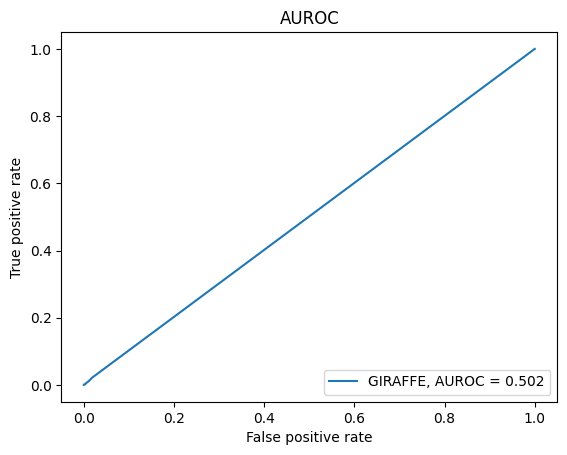

[0.502]

In [31]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [R_tigress.to_numpy().flatten()], ["GIRAFFE"])

### 2.7. BITFAM [5]

In [10]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
tf_ids = {}
for tf in motif.columns:
    trans = list(translation[translation['gene_name'] == tf]['gene_id'])
    if len(trans) == 0:
        continue
    else:
        trans = trans[0][0:15]
        tf_ids[trans] = tf
R_bitfam = pd.DataFrame(0, index=motif.index, columns=motif.columns)
files = ['1', '3001', '6001', '9001', '12001', '15001', '18001', '21001', '24001', '27001']
for file in files:
    a = pd.read_csv("data/colon/R_bitfam_" + file + ".csv", index_col = 0)
    for tf in a.columns:
        for g in a.index:
            if tf not in tf_ids.keys():
                continue
            R_bitfam.at[g, tf_ids[tf]] = a.at[g, tf]
    print("File done!")

File done!
File done!
File done!
File done!
File done!
File done!
File done!
File done!
File done!
File done!


### Results

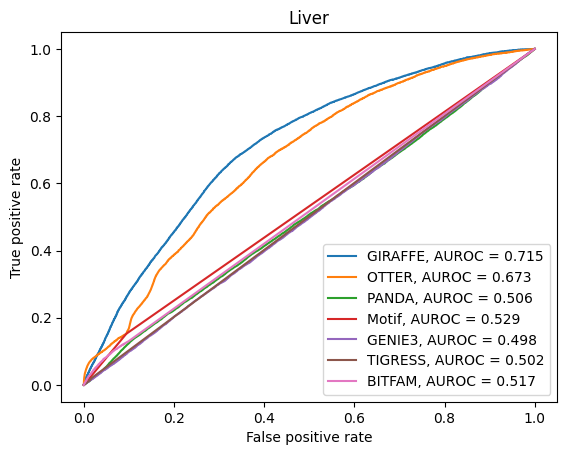

[0.715, 0.673, 0.506, 0.529, 0.498, 0.502, 0.517]

In [11]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), 
                          [R_giraffe.to_numpy().flatten(), R_otter.to_numpy().flatten(), R_panda.to_numpy().flatten(), motif.to_numpy().flatten(), R_genie.to_numpy().flatten(), R_tigress.to_numpy().flatten(), R_bitfam.to_numpy().flatten()],
                          ["GIRAFFE", "OTTER", "PANDA", "Motif", "GENIE3", "TIGRESS", "BITFAM"], "Liver")